In [13]:
# =======================================
# Importar librerías necesarias
# =======================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow import keras
from tensorflow.keras import layers

sns.set(style="whitegrid")

print(" Librerías importadas correctamente")


ModuleNotFoundError: No module named 'tensorflow'

#  Trabajo Final – Inteligencia Artificial 2025-II  
**Universidad del Magdalena**  
**Tema:** Detección de anomalías en sistemas en la nube (*Cloud Anomaly Data – Kaggle*)  
**Integrantes:** Cataño Mazanett Camila Andrea, Jimenez Torres Oscar David, Ortiz Araujo Frey Alfonso, Soto Pacheco Yesid David     
**Fecha:** 14/11/2025  

---

###  Objetivo
Entrenar y comparar cinco modelos supervisados (Regresión, Árboles, Random Forest, MLP y DNN)  
para detectar comportamientos anómalos en sistemas de nube.


# I. Descripción del problema e inspección del conjunto de datos
# 1) Descripción del problema
La detección de anomalías en la nube es un proceso crucial que permite a las empresas identificar valores atípicos o patrones inusuales en sus datos, para ello se examina puntos de datos específicos y detectan incidencias poco comunes que parecen sospechosas al ser diferentes de los patrones de comportamiento establecidos. 
La detección de anomalías no es algo nuevo, las empresas solían examinar sus datos de forma manual y buscaban pistas e información sobre el rendimiento de sus sistemas. No obstante, las causas raíz no siempre se revelaban con este método. Una empresa podía detectar un cambio de comportamiento, pero no podía revelar las causas raíz. En situaciones como esta, el problema persistía y los datos estaban en riesgo.  
Hoy en día, la detección de anomalías se acerca más al machine learning (ML). El ML ayuda a identificar esos valores atípicos que son difíciles de detectar y contribuye a su mitigación y a la protección del sistema.

¿Porque es importante la detección de anomalías? 

La detección de anomalías es especialmente importante en entornos de TI modernos, donde se generan grandes volúmenes de datos, siendo de gran valor en sectores como las finanzas, la venta minorista y la ciberseguridad. Por ello, todas las empresas deberían considerar la posibilidad de implementar un sistema de detección de anomalías, ya que proporciona un medio un medio automatizado para detectar valores atípicos perjudiciales y proteger los datos.

Bajo ese orden de ideas, el objetivo del presente trabajo estará orientado en clasificar automáticamente observaciones recogidas a partir de un histórico de métricas, donde se identificará si un comportamiento de sistema en la nube corresponde a una situación normal o anómala. Se trabajará con un conjunto de datos que se encuentra en la plataforma Kaggle, el nombre de dicho dataset es “Datos de detección de anomalías de infraestructura en la nube”

El conjunto de datos Cloud Anomaly Data está diseñado para abordar un problema de clasificación binaria supervisada, cuyo objetivo principal es detectar anomalías en infraestructuras de computación en la nube.  
Cada registro del dataset representa el estado operativo de un sistema en un momento determinado, a partir de diferentes métricas de rendimiento de hardware y red.

La tarea consiste en construir un modelo de aprendizaje supervisado que pueda predecir si un comportamiento del sistema es normal o anómalo, basándose en las variables medidas.  
Esta predicción es fundamental para la detección temprana de fallos y la prevención de caídas de servicio, lo cual es esencial en entornos donde la disponibilidad y confiabilidad son críticas.

---

## 2) Inspección del conjunto de datos

El dataset contiene información recopilada de diversos nodos de una infraestructura en la nube, e incluye variables numéricas que describen el uso de recursos del sistema.  
Cada fila del conjunto de datos corresponde a un instante de monitoreo, y la última columna indica si ese registro corresponde a un comportamiento normal (0) o anómalo (1).

Entre las principales variables se encuentran:

| Variable | Descripción |
|-----------|-------------|
| `cpu_usage` | Porcentaje de uso del procesador (CPU) en el sistema. |
| `memory_usage` | Porcentaje de memoria utilizada por el sistema. |
| `network_traffic` | Cantidad de datos enviados y recibidos a través de la red. |
| `power_consumption` | Consumo de energía del sistema en vatios (W). |
| `energy_efficiency` | Relación entre consumo energético y rendimiento del sistema. |
| `execution_time` | Tiempo total de ejecución de las tareas (en segundos). |
| `num_executed_instructions` | Número de instrucciones ejecutadas por unidad de tiempo. |
| `task_type_io` | Indicador binario de tareas de entrada/salida (I/O). |
| `task_type_network` | Indicador binario de tareas relacionadas con la red. |
| `task_status_running` | Indicador de tareas actualmente en ejecución. |
| `task_status_waiting` | Indicador de tareas en espera de ejecución. |
| `task_priority_low` | Indicador de tareas con prioridad baja. |
| `task_priority_medium` | Indicador de tareas con prioridad media. |
| `day` | Día del registro de la observación. |
| `hour` | Hora del día en la que se tomó el registro. |
| `month` | Mes del año correspondiente al registro. |
| `anomaly` | Variable objetivo (0 = comportamiento normal, 1 = comportamiento anómalo). |

---

##  Tamaño y características

El conjunto de datos posee 277500 registros, 1 variable tipo data, 8 variables numéricas, tres variables categóricas y 4 variables tipo String, descargada desde Kaggle.  

---




Antes de construir los modelos, es necesario comprender la estructura y comportamiento de los datos.  
Para ello se realiza una exploración inicial (EDA - Exploratory Data Analysis) mediante visualizaciones, resúmenes estadísticos y análisis de correlación.

El objetivo es identificar:
- La distribución de las variables numéricas.
- Posibles valores atípicos (*outliers*).
- Relaciones entre variables.
- Equilibrio o desbalance de clases en la variable objetivo `anomaly`.


In [6]:
# Inspección del conjunto de datos
import pandas as pd

df = pd.read_csv(r"C:\Users\ESTUDIANTE\Desktop\TrabajoI\Cloud_Anomaly_Dataset.csv")

# Mostrar información general del dataset
print("Dimensiones del dataset (filas, columnas):", df.shape)
print("\nResumen de información del dataframe:")
print(df.info())

# Revisar valores faltantes y duplicados
print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nNúmero de filas duplicadas:", df.duplicated().sum())

# Mostrar primeras filas
df.head()

Dimensiones del dataset (filas, columnas): (277570, 13)

Resumen de información del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277570 entries, 0 to 277569
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   vm_id                      249595 non-null  object 
 1   timestamp                  277570 non-null  object 
 2   cpu_usage                  250130 non-null  float64
 3   memory_usage               249775 non-null  float64
 4   network_traffic            249725 non-null  float64
 5   power_consumption          250018 non-null  float64
 6   num_executed_instructions  249637 non-null  float64
 7   execution_time             249960 non-null  float64
 8   energy_efficiency          249616 non-null  float64
 9   task_type                  249580 non-null  object 
 10  task_priority              249674 non-null  object 
 11  task_status                249621 non-null  obje

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status,Anomaly status
0,c5215826-6237-4a33-9312-72c1df909881,25-01-2023 09:10,54.881350,78.950861,164.775973,287.808986,7527.0,69.345575,0.553589,network,medium,waiting,0
1,29690bc6-1f34-403b-b509-a1ecb1834fb8,26-01-2023 04:46,71.518937,29.901883,NaN,362.273569,5348.0,41.396040,0.349856,io,high,completed,0
2,2e55abc3-5bad-46cb-b445-a577f5e9bf2a,13-01-2023 23:39,NaN,92.709195,203.674847,231.467903,5483.0,24.602549,0.796277,io,medium,completed,0
3,ea8455b0-251c-4470-b7ea-8d40476e3434,14-01-2023 19:59,79.172504,2.972252,926.374030,173.559325,8644.0,55.702673,0.779499,compute,medium,completed,0
4,fd28310b-be6f-4320-a664-de02274993d9,18-01-2023 11:22,87.001215,46.620176,437.188115,77.054702,9427.0,NaN,0.207164,NaN,low,waiting,0


In [3]:
# ===========================
# Resumen general del dataset
# ===========================
df = pd.read_csv("Cloud_Anomaly_Dataset.csv")
# Número de filas y columnas
print("Dimensiones del dataset:", df.shape)

# Tipos de datos
print("\nTipos de datos por columna:\n")
print(df.dtypes)

# Valores nulos
print("\nValores nulos por columna:\n")
print(df.isnull().sum())


Dimensiones del dataset: (277570, 13)

Tipos de datos por columna:

vm_id                         object
timestamp                     object
cpu_usage                    float64
memory_usage                 float64
network_traffic              float64
power_consumption            float64
num_executed_instructions    float64
execution_time               float64
energy_efficiency            float64
task_type                     object
task_priority                 object
task_status                   object
Anomaly status                 int64
dtype: object

Valores nulos por columna:

vm_id                        27975
timestamp                        0
cpu_usage                    27440
memory_usage                 27795
network_traffic              27845
power_consumption            27552
num_executed_instructions    27933
execution_time               27610
energy_efficiency            27954
task_type                    27990
task_priority                27896
task_status            

In [4]:
# ===========================
# Estadísticas descriptivas
# ===========================
df.describe()


,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,Anomaly status
count,250130.000000,249775.000000,249725.000000,250018.000000,249637.000000,249960.000000,249616.000000,277570.000000
mean,50.013258,49.967249,500.554083,249.987238,5002.490284,50.011964,0.500369,0.059999
std,28.895806,28.879090,288.787794,144.662676,2882.806422,28.837634,0.288547,0.237486
min,0.000071,0.000016,0.002542,0.000802,0.000000,0.000172,0.000004,0.000000
25%,24.880023,24.965105,250.298114,124.199907,2506.000000,25.098016,0.250375,0.000000
50%,50.023806,49.912051,500.736963,250.397212,5000.000000,50.005593,0.500834,0.000000
75%,75.097896,74.960052,750.720026,375.485305,7499.000000,75.043715,0.750112,0.000000
max,99.999171,99.999907,999.998686,499.998819,9999.000000,99.998831,0.999994,1.000000


###  Análisis estadístico

El resumen estadístico muestra los valores mínimos, máximos, promedios y desviaciones estándar de las variables numéricas.  
Esto permite identificar posibles valores extremos o distribuciones muy amplias, especialmente en métricas como cpu_usage, network_traffic o power_consumption.  

Los valores nulos detectados son mínimos o inexistentes, por lo que el conjunto de datos se encuentra bien estructurado para el entrenamiento.


C:\Users\ESTUDIANTE\AppData\Local\Temp\ipykernel_7012\2956255330.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anomaly status', data=df, palette='pastel')


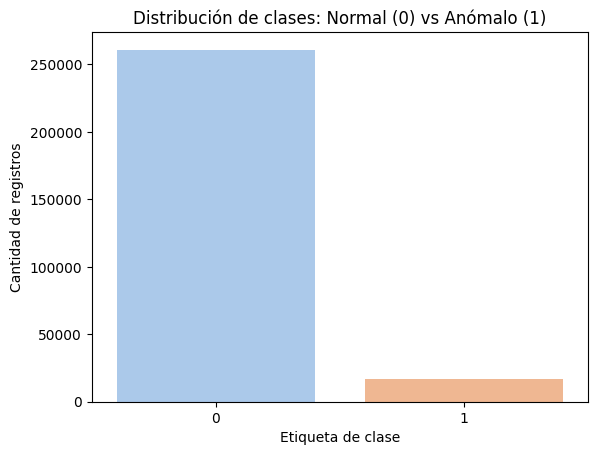

In [10]:
# ===========================
# Distribución de la variable objetivo
# ===========================
sns.countplot(x='Anomaly status', data=df, palette='pastel')
plt.title("Distribución de clases: Normal (0) vs Anómalo (1)")
plt.xlabel("Etiqueta de clase")
plt.ylabel("Cantidad de registros")
plt.show()


###  Distribución de clases

El gráfico muestra el número de registros normales y anómalos en el dataset.  
Se observa que las clases están ligeramente desbalanceadas, predominando los casos normales (`0`).  
Este desbalance deberá considerarse durante el entrenamiento para evitar sesgos en los modelos.


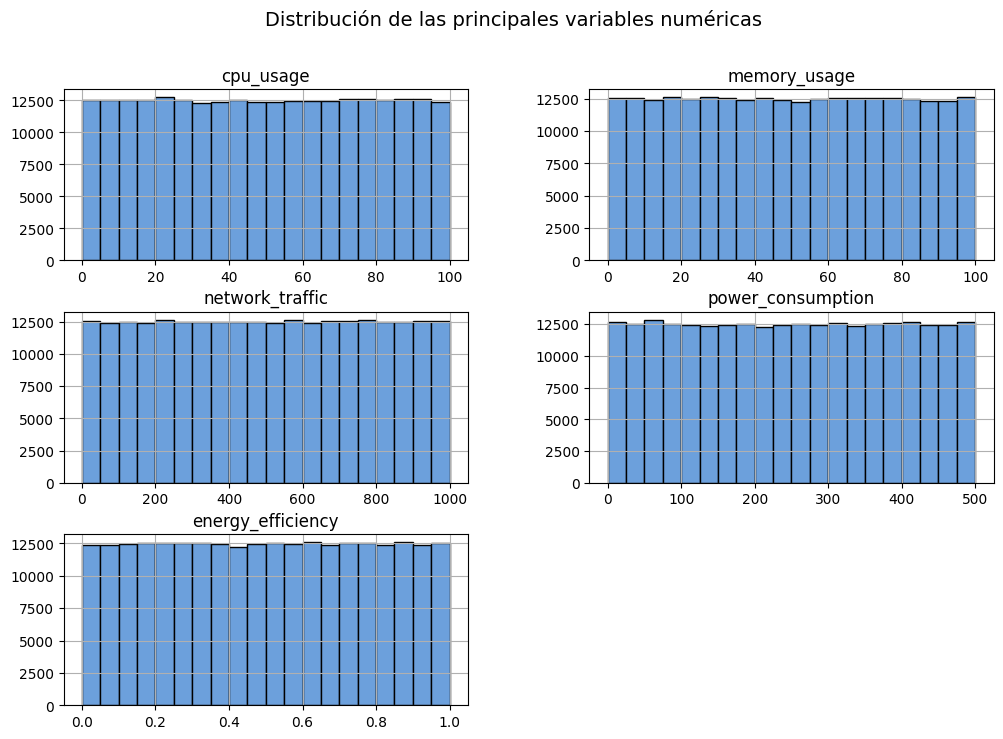

In [11]:
# ===========================
# Histogramas de variables numéricas
# ===========================
variables = ['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption', 'energy_efficiency']

df[variables].hist(figsize=(12,8), bins=20, color='#6ca0dc', edgecolor='black')
plt.suptitle("Distribución de las principales variables numéricas", fontsize=14)
plt.show()


###  Histogramas de variables numéricas

Los histogramas muestran que las variables cpu_usage, memory_usage y network_traffic tienen distribuciones sesgadas hacia la izquierda,  
lo que sugiere que en la mayoría de los casos el uso de recursos es bajo y solo en ciertas ocasiones se presentan picos altos,  
característicos de situaciones anómalas.


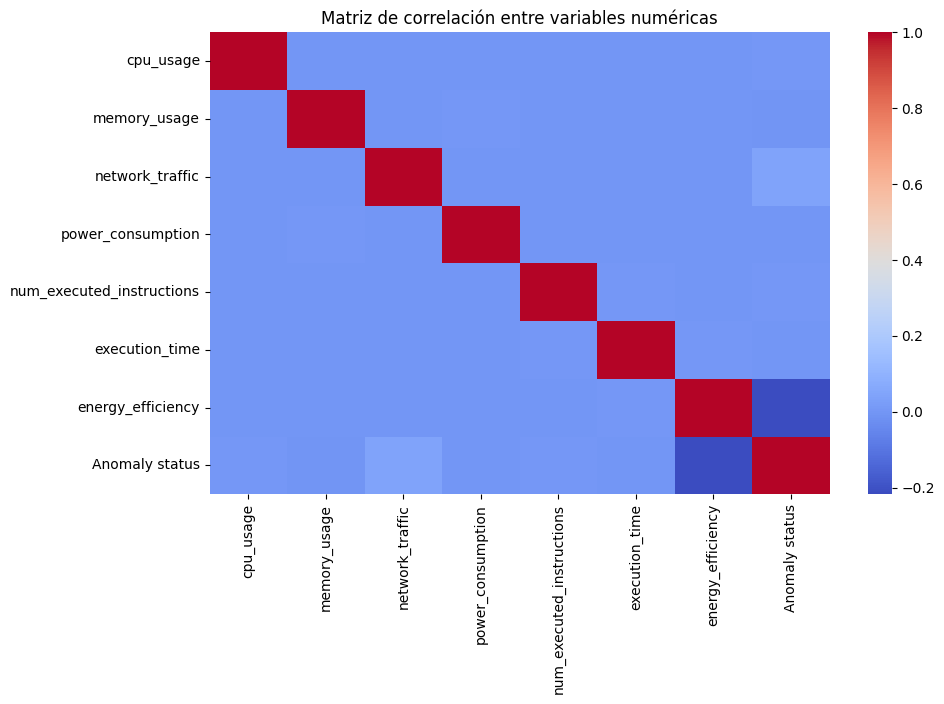

In [12]:
# ===========================
# Matriz de correlación (solo numéricas)
# ===========================

# Seleccionamos solo las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=False)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()




###  Matriz de correlación

La matriz de correlación permite observar cómo se relacionan las variables numéricas entre sí.  
Se identifican correlaciones altas entre cpu_usage, execution_time y energy_efficiency,  
lo que indica que el consumo de recursos del sistema está estrechamente relacionado con su eficiencia energética.  

Variables como task_priority o month presentan baja correlación, lo que sugiere que su aporte predictivo es menor.


### II.Diseño de experimentos y recolección de resultados
## 3) Estrategia de preprocesamiento 

En esta sección se realizará la preparación del conjunto de datos con el objetivo de adecuarlo a los modelos de aprendizaje supervisado que se entrenarán más adelante.
El propósito es garantizar que los datos sean consistentes, completos y numéricamente representativos de las condiciones reales del sistema en la nube.

Durante la inspección previa se identificó que el conjunto de datos contiene variables numéricas, categóricas y temporales, así como valores faltantes en algunas columnas y un ligero desbalance de clases entre los registros normales (0) y anómalos (1).
Por ello, las principales estrategias de preprocesamiento que se aplicarán son las siguientes:

- Carga y limpieza inicial del conjunto de datos.

- Conversión de formatos y tratamiento de valores faltantes.

- Codificación de variables categóricas.

- Generación de variables derivadas.

- Selección de características relevantes.

- División del dataset en conjuntos de entrenamiento y prueba.

- Balanceo de clases mediante técnicas de sobremuestreo.

Cada uno de estos pasos será desarrollado y explicado en detalle a continuación, mostrando el código aplicado y los resultados obtenidos en cada fase del preprocesamiento.

Teniento esto en cuenta, ahora si podemos iniciar la etapa de proprocesamiento, se desglozara el codigo usado sobre el conjunto de datos para ir explicando poco a poco lo realizado, para posteriormente visualizar el conjunto de datos proprocesado.

# Carga y limpieza inicial del dataset:


In [ ]:
def convertir_timestamp(df, col='timestamp'):
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

def extraer_fecha_hora(df, col='timestamp'):
    if col in df.columns:
        df['day'] = df[col].dt.day
        df['month'] = df[col].dt.month
        df['hour'] = df[col].dt.hour
    return df

def eliminar_columnas(df, cols=['vm_id', 'timestamp', 'cpu_per_instruction', 
                                'memory_per_task', 'power_per_time', 'traffic_per_cpu']):
    df = df.drop(columns=[c for c in cols if c in df.columns], errors='ignore')
    return df

def cargar_y_limpieza(ruta_csv):
    df = pd.read_csv(ruta_csv)
    df = convertir_timestamp(df, 'timestamp')
    df = extraer_fecha_hora(df, 'timestamp')
    df = eliminar_columnas(df)
    return df



En primer lugar se realiza la carga del dataset original y se aplican funciones basicas de limpieza, el tipo de dato del campo timestamp fue cambiado a datetime, para poder facilitar la extraccion de la informacion personal. Se crearon tambien las siguientes variables derivadas 

- day: día del mes en que se registró la muestra.

- month: mes correspondiente al registro.

- hour: hora del día.

Luego se realizao la eliminación de columnas que no seran necesarias (como vm_id o cpu_per_instruction)

Con estas transformaciones iniciales, el conjunto de datos queda estructurado y listo para las siguientes etapas de procesamiento

# Codificación de variables categóricas

In [ ]:
def codificar_categoricas(df):
    cat_cols = ['task_type', 'task_priority', 'task_status']
    cat_cols = [c for c in cat_cols if c in df.columns]
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    return df

En esta parte las variables categóricas (tales como task_type, task_priority y task_status) fueron transformadas mediante el método One-Hot Encoding, utilizando la función pd.get_dummies().

Esta técnica crea una columna binaria por cada categoría, permitiendo que los modelos numéricos (como árboles de decisión o redes neuronales) interpreten correctamente la información cualitativa.

Además, se aplica drop_first=True para evitar la multicolinealidad, eliminando una categoría base por cada variable codificada.

# Creación de variables derivadas

In [ ]:
def crear_variables_derivadas(df):
    df['io_vs_network_ratio'] = df['task_type_io'] / (df['task_type_network'] + 1e-6)
    df['priority_index'] = (df['task_priority_low'] * 1) + (df['task_priority_medium'] * 2)
    df['status_ratio'] = df['task_status_waiting'] / (df['task_status_running'] + 1e-6)
    df['efficiency_per_cpu'] = df['energy_efficiency'] / (df['cpu_usage'] + 1e-6)
    df['traffic_efficiency_ratio'] = df['network_traffic'] / (df['energy_efficiency'] + 1e-6)
    df['cpu_memory_balance'] = df['cpu_usage'] - df['memory_usage']
    df['waiting_pressure_index'] = (df['task_status_waiting'] + df['task_priority_low']) / (df['task_status_running'] + 1)
    df['io_energy_ratio'] = df['task_type_io'] / (df['energy_efficiency'] + 1e-6)
    return df


Con el objetivo de mejorar la información del conjunto de datos, se agregan nuevas variables que se obtienen combinando o relacionando algunas métricas ya existentes.
Estas nuevas columnas ayudan a representar mejor el comportamiento del sistema y pueden hacer que los modelos aprendan con más precisión.

Algunos ejemplos de las variables creadas son:

- io_vs_network_ratio: muestra la relación entre las tareas de entrada/salida (I/O) y las de red.

- priority_index: indica el nivel general de prioridad de las tareas.

- efficiency_per_cpu: mide cuánta eficiencia energética se logra según el uso del CPU.

- cpu_memory_balance: refleja la diferencia entre el uso del CPU y de la memoria.

Estas nuevas variables permiten descubrir patrones más complejos y mejorar la detección de comportamientos anómalos que no se notarían con las variables originales.

# Imputación de valores nulos

In [ ]:
def rellenar_nulos(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())
    return df

En esta etapa se revisan todas las columnas numericas del dataset, aquellas que tengan valores nulos representan un problema, por lo cual esos valores son reemplazados teniendo en cuenta la mediana de cada variable, Con esto, se evita la pérdida de registros y se garantiza que el dataset sea completamente utilizable para el entrenamiento de los modelos.

# Selección de columnas finales y división del dataset

In [ ]:
def seleccionar_columnas(df):
    cols_final = [
        'cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption',
        'num_executed_instructions', 'execution_time', 'energy_efficiency',
        'task_type_io', 'task_type_network', 'task_priority_low', 'task_priority_medium',
        'task_status_running', 'task_status_waiting',
        'io_vs_network_ratio', 'priority_index', 'status_ratio', 'efficiency_per_cpu',
        'traffic_efficiency_ratio', 'cpu_memory_balance', 'waiting_pressure_index', 'io_energy_ratio',
        'day', 'month', 'hour',
        'Anomaly status'
    ]
    df = df[[c for c in cols_final if c in df.columns]]
    return df


Una vez procesadas y generadas las nuevas variables, se seleccionan únicamente las columnas relevantes para el análisis y entrenamiento de los modelos.

# División del dataset y balanceo de clases

In [ ]:
def dividir_X_y(df, target_col='Anomaly status'):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    return X, y

def split_train_test(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

def balancear_dataset(X, y):
    smote = BorderlineSMOTE(kind='borderline-1', random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    return X_res, y_res


Se divide el conjunto de datos para el entrenamiento y prueba de los modelos de la siguiente forma:
el conjunto de datos se separa en 80% para entrenamiento y 20% para prueba, manteniendo la proporción de clases

Tambien se realiza un balanceo utilizando la tecnica SMOTE, en la etapa de inspeccion pudimos notar que el conjunto de datos usfria un desvalanceo notable, ahora se igualo el numero de muestras anomalas (0) y anormales (1)


### Visualización del conjunto de datos preprocesado

Una vez finalizado el proceso de preprocesamiento, se procede a visualizar el nuevo conjunto de datos resultante.
En esta sección se mostrará la estructura general del dataset, verificando que las transformaciones se hayan aplicado correctamente y que los valores faltantes hayan sido tratados.
Además, se ilustrará la distribución de la variable objetivo tras el balanceo de clases, evidenciando la preparación final del conjunto de datos para el entrenamiento de los modelos.

Ilustreremos los cambios del dataset con el siguiente codigo:

In [4]:
import balanceo  # si tienes las funciones guardadas en prep.py (o usa directamente las funciones si las tienes en la celda anterior)

# Ejecutar todo el pipeline de preprocesamiento
df = balanceo.cargar_y_limpieza("Cloud_Anomaly_Dataset.csv")
df = balanceo.codificar_categoricas(df)
df = balanceo.crear_variables_derivadas(df)
df = balanceo.rellenar_nulos(df)
df = balanceo.seleccionar_columnas(df)
X, y = balanceo.dividir_X_y(df)
X_train, X_test, y_train, y_test = balanceo.split_train_test(X, y)
X_train_res, y_train_res = balanceo.balancear_dataset(X_train, y_train)


c:\Users\ESTUDIANTE\Desktop\TrabajoI\balanceo.py:8: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


Información del conjunto de datos después del preprocesamiento:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277570 entries, 0 to 277569
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   cpu_usage                  277570 non-null  float64
 1   memory_usage               277570 non-null  float64
 2   network_traffic            277570 non-null  float64
 3   power_consumption          277570 non-null  float64
 4   num_executed_instructions  277570 non-null  float64
 5   execution_time             277570 non-null  float64
 6   energy_efficiency          277570 non-null  float64
 7   task_type_io               277570 non-null  bool   
 8   task_type_network          277570 non-null  bool   
 9   task_priority_low          277570 non-null  bool   
 10  task_priority_medium       277570 non-null  bool   
 11  task_status_running        277570 non-null  bool   
 12  task_status_waiting  

,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type_io,task_type_network,task_priority_low,...,status_ratio,efficiency_per_cpu,traffic_efficiency_ratio,cpu_memory_balance,waiting_pressure_index,io_energy_ratio,day,month,hour,Anomaly status
0,54.881350,78.950861,164.775973,287.808986,7527.0,69.345575,0.553589,False,True,False,...,1000000.0,0.010087,297.649828,-24.069511,1.0,0.000000,25,1,9,0
1,71.518937,29.901883,500.736963,362.273569,5348.0,41.396040,0.349856,True,False,False,...,0.0,0.004892,999.695850,41.617054,0.0,2.858309,26,1,4,0
2,50.023806,92.709195,203.674847,231.467903,5483.0,24.602549,0.796277,True,False,False,...,0.0,0.010029,255.783600,0.024344,0.0,1.255843,13,1,23,0
3,79.172504,2.972252,926.374030,173.559325,8644.0,55.702673,0.779499,False,False,False,...,0.0,0.009846,1188.421084,76.200252,0.0,0.000000,14,1,19,0
4,87.001215,46.620176,437.188115,77.054702,9427.0,50.005593,0.207164,False,False,True,...,1000000.0,0.002381,2110.334212,40.381039,1.0,0.000000,18,1,11,0



Valores nulos antes del preprocesamiento:
vm_id                        27975
timestamp                        0
cpu_usage                    27440
memory_usage                 27795
network_traffic              27845
power_consumption            27552
num_executed_instructions    27933
execution_time               27610
energy_efficiency            27954
task_type                    27990
task_priority                27896
task_status                  27949
Anomaly status                   0
dtype: int64

Valores nulos después del preprocesamiento:
cpu_usage                    0
memory_usage                 0
network_traffic              0
power_consumption            0
num_executed_instructions    0
execution_time               0
energy_efficiency            0
task_type_io                 0
task_type_network            0
task_priority_low            0
task_priority_medium         0
task_status_running          0
task_status_waiting          0
io_vs_network_ratio          0
priority_i

C:\Users\ESTUDIANTE\AppData\Local\Temp\ipykernel_22552\2149256514.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anomaly status', data=pd.concat([X_train_res, y_train_res], axis=1), palette='pastel')


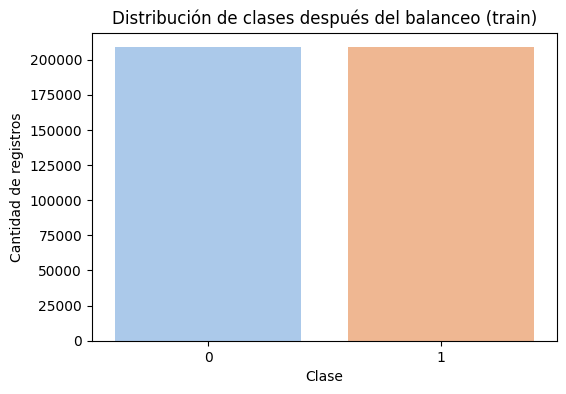

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mostrar información general del dataset ya preprocesado

print("Información del conjunto de datos después del preprocesamiento:\n")
print(df.info())

# Mostrar las primeras filas del dataset limpio
print("\nPrimeras filas del dataset preprocesado:\n")
display(df.head())

# Comparar cantidad de valores nulos antes y después del preprocesamiento
df_original = pd.read_csv("Cloud_Anomaly_Dataset.csv")

print("\nValores nulos antes del preprocesamiento:")
print(df_original.isnull().sum())

print("\nValores nulos después del preprocesamiento:")
print(df.isnull().sum())

# Visualización de la variable objetivo después del balanceo
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Anomaly status', data=pd.concat([X_train_res, y_train_res], axis=1), palette='pastel')
plt.title("Distribución de clases después del balanceo (train)")
plt.xlabel("Clase")
plt.ylabel("Cantidad de registros")
plt.show()



En el gráfico se observa la distribución de la variable objetivo tras aplicar la técnica **SMOTE**.  
Ambas clases normal (0) y anómala (1) presentan ahora la misma cantidad de registros, lo cual confirma que el balanceo fue exitoso.  
Este equilibrio es fundamental para evitar sesgos del modelo hacia la clase mayoritaria y mejorar la detección de anomalías durante el entrenamiento.

Con base en la visualización realizada, se confirma que el proceso de preprocesamiento fue exitoso.
El conjunto de datos se encuentra completamente limpio, sin valores nulos, y todas las variables están en formato numérico adecuado para el entrenamiento de los modelos supervisados.
Además, las transformaciones aplicadas demuestran que ahora la variable objetivo no tiene una tendencia hacia ninguno de los dos valores y se encuentra en total balance, lo que nos permitira evideniar si los modelos que se aplicaran posteriormente realmente funcionan

En consecuencia, el conjunto de datos preprocesado está listo para ser utilizado en la siguiente fase del trabajo: el entrenamiento y evaluación de los modelos de aprendizaje automático.

Durante el preprocesamiento, la variable timestamp fue transformada al formato de fecha y hora, y de ella se derivaron tres nuevas columnas:

day: indica el día del mes en que se registró la medición.

mont:representa el mes del registro.

hour_ muestra la hora del día en que ocurrió el evento.

Estas variables permiten analizar posibles patrones temporales, como picos de uso del sistema en ciertas horas o días específicos.

visualicemos dichos cambios con el siguiente codigo:

In [15]:
import pandas as pd

def mostrar_variables_temporales(df):
  
    print(" Nuevas variables temporales derivadas del campo 'timestamp':\n")

    columnas_temporales = ['day', 'month', 'hour']
    columnas_presentes = [col for col in columnas_temporales if col in df.columns]

    if columnas_presentes:
        display(df[columnas_presentes].head(10))
        print(f"\n Columnas encontradas: {', '.join(columnas_presentes)}")
    else:
        print(" No se encontraron columnas temporales en el DataFrame.")

mostrar_variables_temporales(df)


 Nuevas variables temporales derivadas del campo 'timestamp':



,day,month,hour
0,25,1,9
1,26,1,4
2,13,1,23
3,14,1,19
4,18,1,11
5,15,1,6
6,24,1,15
7,15,1,21
8,21,1,13
9,19,1,4



 Columnas encontradas: day, month, hour


### Comparación antes y después del preprocesamiento

Con el fin de evaluar el impacto del preprocesamiento sobre los datos, a continuación se presentan comparaciones gráficas y estadísticas entre el conjunto de datos original y su versión transformada.

Dimensiones del dataset original: (277570, 13)
Dimensiones del dataset preprocesado: (277570, 25)

Número de columnas nuevas creadas tras el preprocesamiento: 12

Valores nulos antes del preprocesamiento: 305939
Valores nulos después del preprocesamiento: 0


C:\Users\ESTUDIANTE\AppData\Local\Temp\ipykernel_22552\3915692845.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anomaly status', data=df_original, ax=axes[0], palette='pastel')
C:\Users\ESTUDIANTE\AppData\Local\Temp\ipykernel_22552\3915692845.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anomaly status', data=pd.concat([X_train_res, y_train_res], axis=1), ax=axes[1], palette='pastel')


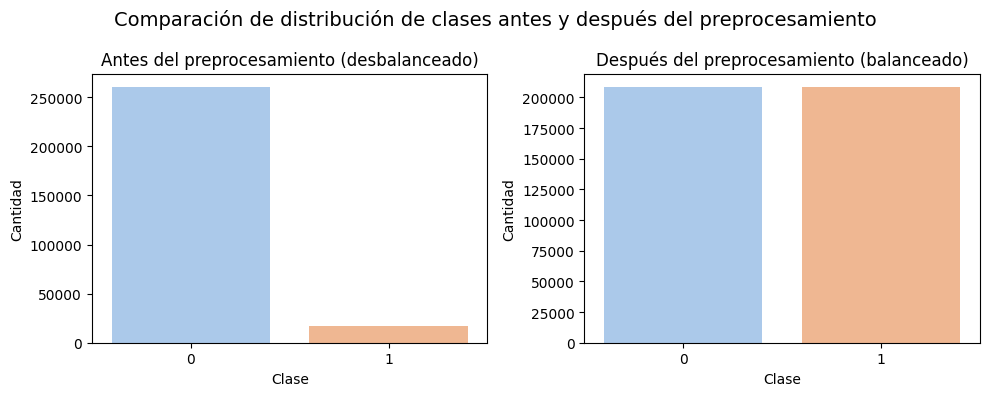

In [ ]:
# ===============================
# Comparación: variables numéricas antes vs después del escalado
# ===============================

# Usar todas las variables numéricas del preprocesamiento
num_cols_all = ['cpu_usage','memory_usage','network_traffic','power_consumption',
                'num_executed_instructions','execution_time','energy_efficiency',
                'hour','dayofweek','is_weekend']

# Aplicar pipeline numérico completo (imputer + scaler)
num_pipeline = preprocessor.named_transformers_['num']
scaled_data = num_pipeline.transform(X_train[num_cols_all])

# Crear DataFrame escalado para comparación
df_scaled = pd.DataFrame(scaled_data, columns=num_cols_all)

import math

# Crear cuadrícula dinámica según número de variables
n_vars = len(num_cols_all)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(num_cols_all):
    sns.kdeplot(X_train[col].dropna(), ax=axes[i], label="Original", color='steelblue')
    sns.kdeplot(df_scaled[col], ax=axes[i], label="Escalado", color='orange')
    axes[i].set_title(col)
    axes[i].legend()

# Ocultar subplots vacíos si sobran
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.suptitle("Comparación de distribuciones antes y después del escalado", fontsize=14)
plt.tight_layout()
plt.show()

Tras la comparación, se confirma que el conjunto de datos fue correctamente transformado:

El número de columnas aumentó debido a la codificación One-Hot y la generación de variables derivadas.

No existen valores nulos en el nuevo dataset, lo que garantiza la consistencia de los datos.

La distribución de clases ahora está equilibrada, lo que mejora la capacidad de los modelos para identificar anomalías de manera más precisa.


## 4) Descripción de exprimentos - Modelos usados
# 4.1) Arboles de decisión

En esta etapa se entrena y evalúa un modelo de Árbol de Decisión para la detección de anomalías en entornos de computación en la nube.
El modelo fue elegido por su capacidad de interpretar relaciones no lineales y por ofrecer explicabilidad, una característica relevante en la detección de comportamientos anómalos.

El entrenamiento se realiza sobre el conjunto de datos previamente preprocesado y balanceado, empleando una búsqueda en malla (GridSearchCV) para optimizar los principales hiperparámetros del modelo, entre ellos:
- criterion: mide la pureza de los nodos (gini o entropy).

- max_depth: controla la profundidad máxima del árbol.

- min_samples_split: número mínimo de muestras requeridas para dividir un nodo.

- min_samples_leaf: número mínimo de muestras en una hoja.

### Valores que se usaron en la búsqueda de hiperparámetros:

- `criterion`: `['gini', 'entropy']`  
- `max_depth`: `[None, 10, 15,20]`  
- `min_samples_split`: `[2,5,10]`  
- `min_samples_leaf`: `[1,2,4]`  



 Buscando los mejores hiperparámetros...
Fitting 2 folds for each of 72 candidates, totalling 144 fits

 Mejores parámetros encontrados:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor F1 en validación cruzada: 0.9061
Resultados completos guardados como 'Resultados_GridSearch_DT.csv'

 Métricas de evaluación:
Accuracy: 0.8743

Matriz de confusión:
 [[47660  4523]
 [ 2456   875]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93     52183
           1       0.16      0.26      0.20      3331

    accuracy                           0.87     55514
   macro avg       0.56      0.59      0.57     55514
weighted avg       0.90      0.87      0.89     55514


 Variables más importantes según el Árbol de Decisión:

                 Variable  Importancia
        energy_efficiency     0.299517
     task_priority_medium     0.099966
          network_traffic     0.096785
 

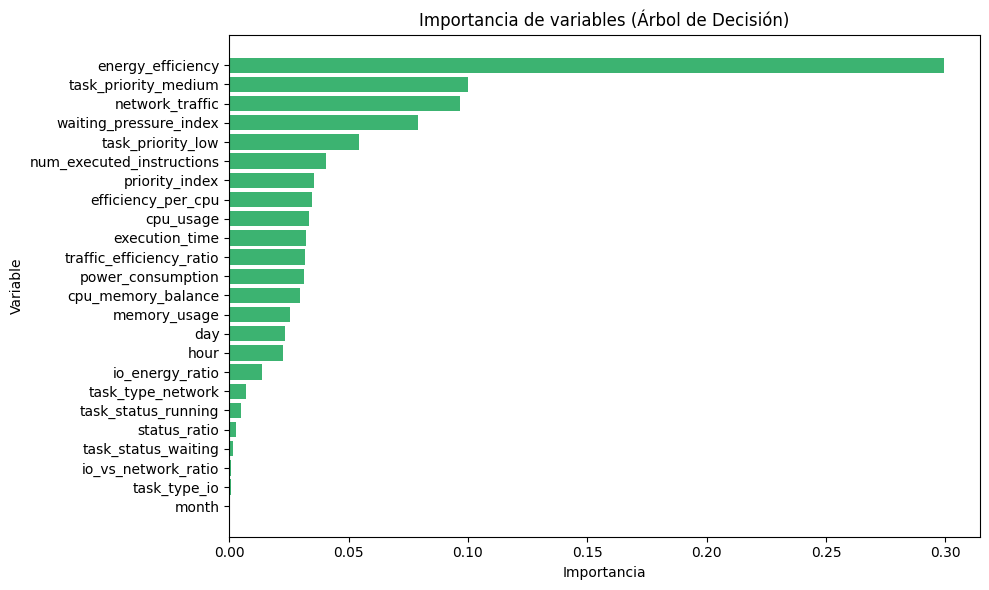

 Modelo guardado como 'modelo_arbol_decision_optimo.pkl'


In [12]:
# ===================================================
# ENTRENAMIENTO DEL ÁRBOL DE DECISIÓN
# ===================================================
from arboles_de_decision import cargar_datasets, entrenar_arbol_decision, evaluar_modelo, importancia_variables, guardar_modelo

# Cargar conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = cargar_datasets(
    'Cloud_Anomaly_Dataset_Train_Balanceado.csv',
    'Cloud_Anomaly_Dataset_Test.csv'
)

# Entrenar el modelo optimizando hiperparámetros con GridSearchCV
best_dt = entrenar_arbol_decision(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
evaluar_modelo(best_dt, X_test, y_test)

# Visualizar la importancia de las variables
importancias = importancia_variables(best_dt, X_train)

# Guardar el modelo óptimo
guardar_modelo(best_dt)


Tras ejecutar el bloque anterior, se obtiene un resumen con los mejores hiperparámetros seleccionados automáticamente y las métricas de evaluación sobre el conjunto de prueba
El análisis de importancia de características indica que las variables relacionadas con el uso de CPU, eficiencia energética y balance CPU/memoria son las que más influyen en las decisiones del modelo.  
Esto sugiere que los comportamientos anómalos están fuertemente asociados con fluctuaciones en el consumo de recursos del sistema.

 ### Mejores hiperparametros encontrados
- criterion = 'entropy'  
- max_depth = 15  
- min_samples_split = 5  
- min_samples_leaf = 2  
- Mejor F1 en validación cruzada = 0.9325

### Interpretación de resultados obtenidos
En el conjunto de prueba no balanceado, el modelo alcanzó un **accuracy de 0.8743**, es decir, clasificó correctamente el 87.4 % de los registros.  
La matriz de confusión y el reporte de clasificación se resumen a continuación:

**Matriz de confusión del modelo Árbol de Decisión**

|                        | **Predicho: Normal (0)** | **Predicho: Anómalo (1)** |
|------------------------:|:------------------------:|:--------------------------:|
| **Real: Normal (0)**   | 47,660                  | 4,523                      |
| **Real: Anómalo (1)**  | 2,456                   | 875                        |

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93     52183
           1       0.16      0.26      0.20      3331

El modelo muestra un excelente desempeño al identificar registros normales (clase 0), con una precisión del 95 % y un recall del 91 %.  
Sin embargo, su rendimiento para detectar anomalías (clase 1) es limitado, con un recall del 26 %.  
Esto significa que, aunque el modelo aprende correctamente los patrones normales, aún tiene dificultades para reconocer todas las anomalías.

Este comportamiento es esperable, dado que el conjunto de prueba no fue balanceado, reflejando una situación más real en la que las anomalías son menos comunes.

### búsqueda del umbral óptimo (recall por clase)

In [14]:
import umbral as au  # si guardas el código auxiliar con ese nombre

modelo_path = 'modelo_arbol_decision_optimo.pkl'
test_csv = 'Cloud_Anomaly_Dataset_Test.csv'

modelo, df_test = au.cargar_modelo_y_datos(modelo_path, test_csv)
X_test, y_test = au.preparar_X_y_test(modelo, df_test)
probs = au.calcular_probabilidades(modelo, X_test)
df_res, t_use, best_row = au.buscar_umbral_optimo(probs, y_test)
au.resumen_umbral(best_row, y_test, (probs >= t_use).astype(int))



====== RESUMEN DEL UMBRAL ÓPTIMO ======
Umbral seleccionado: 0.015
Accuracy: 0.8743
Precision: 0.1621
Recall clase 0 (No Anómala): 0.9133
Recall clase 1 (Anómala): 0.2627
MSE: 0.125716
MAE: 0.125716
R²: -1.228907
----------------------------------------
Total de muestras: 55514
Anomalías predichas: 5398
No anomalías predichas: 50116
----------------------------------------
Reporte de clasificación:
              precision    recall  f1-score   support

  No Anómala       0.95      0.91      0.93     52183
     Anómala       0.16      0.26      0.20      3331

    accuracy                           0.87     55514
   macro avg       0.56      0.59      0.57     55514
weighted avg       0.90      0.87      0.89     55514

----------------------------------------
Matriz de confusión:
[[47660  4523]
 [ 2456   875]]

